<a href="https://colab.research.google.com/github/Tahir7044/machine-learning/blob/master/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout

In [6]:
tf.version

<module 'tensorflow_core._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v2/version/__init__.py'>

In [0]:
from tensorflow.keras.datasets import cifar10

In [8]:
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
x_train.max()

255

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0
print(y_train[:10])

In [14]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


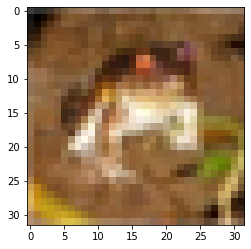

frog


In [16]:
plt.imshow(x_train[0])
plt.show()
print(class_name[y_train[0][0]])

## model build

In [20]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#1st layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))

#2nd layer
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.4))

#3rd layer
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 256)      

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [25]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 32s 805us/sample - loss: 1.6609 - sparse_categorical_accuracy: 0.3896 - val_loss: 1.2545 - val_sparse_categorical_accuracy: 0.5502
Epoch 2/10
40000/40000 [==============================] - 25s 631us/sample - loss: 1.1563 - sparse_categorical_accuracy: 0.5901 - val_loss: 1.0868 - val_sparse_categorical_accuracy: 0.6124
Epoch 3/10
40000/40000 [==============================] - 25s 633us/sample - loss: 0.9682 - sparse_categorical_accuracy: 0.6577 - val_loss: 0.9372 - val_sparse_categorical_accuracy: 0.6686
Epoch 4/10
40000/40000 [==============================] - 25s 636us/sample - loss: 0.8374 - sparse_categorical_accuracy: 0.7072 - val_loss: 0.8834 - val_sparse_categorical_accuracy: 0.6928
Epoch 5/10
40000/40000 [==============================] - 25s 630us/sample - loss: 0.7316 - sparse_categorical_accuracy: 0.7412 - val_loss: 0.8594 - val_sparse_categorical_accuracy: 0.7042
Epoch

In [26]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


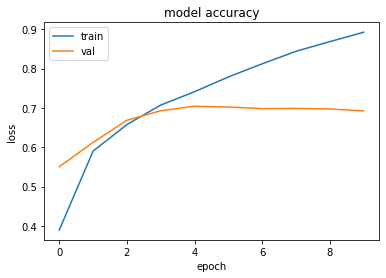

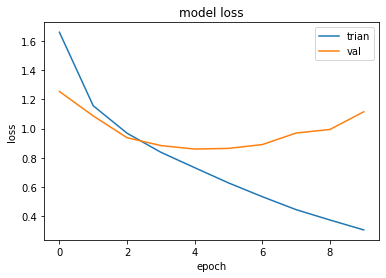

In [30]:
epoch_range=range(10)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"])
plt.show()


plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["trian","val"])
plt.show()

In [34]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#1st layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

#2nd layer
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.4))

#3rd layer
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 512)        

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

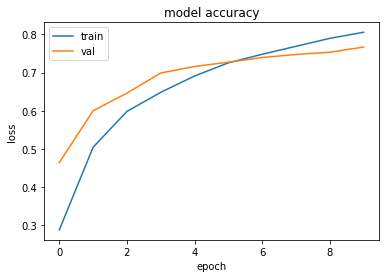

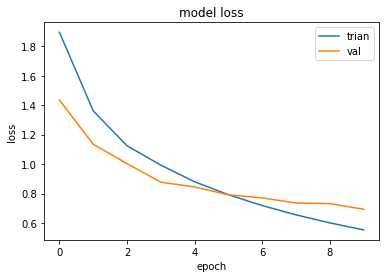

In [37]:
epoch_range=range(10)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"])
plt.show()


plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["trian","val"])
plt.show()

In [50]:
model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#1st layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
#2nd layer
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=1,padding='same'))
model.add(Dropout(0.4))

# #3rd layer
# model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))
# #4th layer
# model.add(Conv2D(filters=128,kernel_size=(1,1),padding='same',activation='relu'))
# model.add(Dropout(0.3))


#5th layer
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
#6th layer
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=1,padding='same'))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 16, 16, 512)     

In [51]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.7727 - sparse_categorical_accuracy: 0.3426 - val_loss: 1.4266 - val_sparse_categorical_accuracy: 0.4801
Epoch 2/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 1.3350 - sparse_categorical_accuracy: 0.5146 - val_loss: 1.1476 - val_sparse_categorical_accuracy: 0.5753
Epoch 3/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 1.1159 - sparse_categorical_accuracy: 0.6037 - val_loss: 1.0452 - val_sparse_categorical_accuracy: 0.6197
Epoch 4/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.9855 - sparse_categorical_accuracy: 0.6537 - val_loss: 0.9542 - val_sparse_categorical_accuracy: 0.6584
Epoch 5/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.8967 - sparse_categorical_accuracy: 0.6855 - val_loss: 0.8525 - val_sparse_categorical_accuracy: 0.7024
Epoch 6/10
4000

In [56]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#1st layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))
#2nd layer
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
#4th layer
model.add(Conv2D(filters=128,kernel_size=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.3))
# #3rd layer
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=1,padding='same'))


model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 31, 31, 256)       295168    
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 8, 8, 128)       

In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 694us/sample - loss: 1.6744 - sparse_categorical_accuracy: 0.3737 - val_loss: 1.2849 - val_sparse_categorical_accuracy: 0.5310
Epoch 2/10
40000/40000 [==============================] - 27s 674us/sample - loss: 1.1759 - sparse_categorical_accuracy: 0.5839 - val_loss: 1.0122 - val_sparse_categorical_accuracy: 0.6423
Epoch 3/10
40000/40000 [==============================] - 27s 673us/sample - loss: 0.9514 - sparse_categorical_accuracy: 0.6652 - val_loss: 0.9430 - val_sparse_categorical_accuracy: 0.6734
Epoch 4/10
40000/40000 [==============================] - 27s 677us/sample - loss: 0.8268 - sparse_categorical_accuracy: 0.7098 - val_loss: 0.8365 - val_sparse_categorical_accuracy: 0.7116
Epoch 5/10
40000/40000 [==============================] - 27s 675us/sample - loss: 0.7242 - sparse_categorical_accuracy: 0.7473 - val_loss: 0.7677 - val_sparse_categorical_accuracy: 0.7329
Epoch

In [70]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#1st layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.3))
#2nd layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))


model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_139 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 8192)            

In [71]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s 270us/sample - loss: 1.5987 - sparse_categorical_accuracy: 0.4053 - val_loss: 1.2412 - val_sparse_categorical_accuracy: 0.5455
Epoch 2/10
40000/40000 [==============================] - 10s 249us/sample - loss: 1.1158 - sparse_categorical_accuracy: 0.6032 - val_loss: 1.0360 - val_sparse_categorical_accuracy: 0.6385
Epoch 3/10
40000/40000 [==============================] - 10s 249us/sample - loss: 0.8826 - sparse_categorical_accuracy: 0.6879 - val_loss: 0.8626 - val_sparse_categorical_accuracy: 0.7031
Epoch 4/10
40000/40000 [==============================] - 10s 248us/sample - loss: 0.7230 - sparse_categorical_accuracy: 0.7470 - val_loss: 0.8293 - val_sparse_categorical_accuracy: 0.7096
Epoch 5/10
40000/40000 [==============================] - 10s 248us/sample - loss: 0.5980 - sparse_categorical_accuracy: 0.7892 - val_loss: 0.8431 - val_sparse_categorical_accuracy: 0.7184
Epoch

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

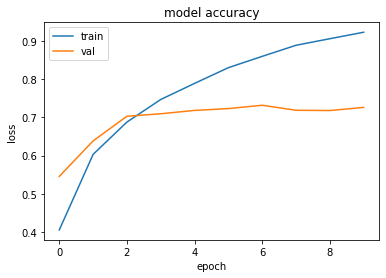

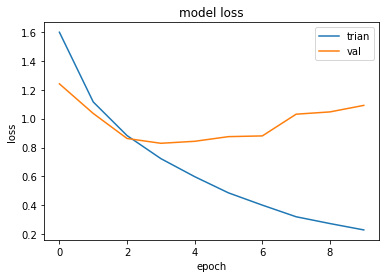

In [73]:
epoch_range=range(10)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"])
plt.show()


plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["trian","val"])
plt.show()

In [0]:
y_pred=model.predict_classes(x_test)
con=confusion_matrix(y_test,y_pred)

In [75]:
print(con)

[[760  18  50  24  16   8   5   8  87  24]
 [ 17 889   3  11   3   4   7   1  21  44]
 [ 85   8 607  57  83  66  59  13  18   4]
 [ 35  13  63 563  62 135  70  19  17  23]
 [ 26   7  85  81 667  32  47  39  13   3]
 [ 21   3  47 234  46 557  38  36   9   9]
 [  6   7  48  82  33  21 784   4  11   4]
 [ 26   5  32  51  78  85  10 689   4  20]
 [ 41  34  10  13   8   1   5   2 868  18]
 [ 34 145   7  24   4   5   5  10  33 733]]


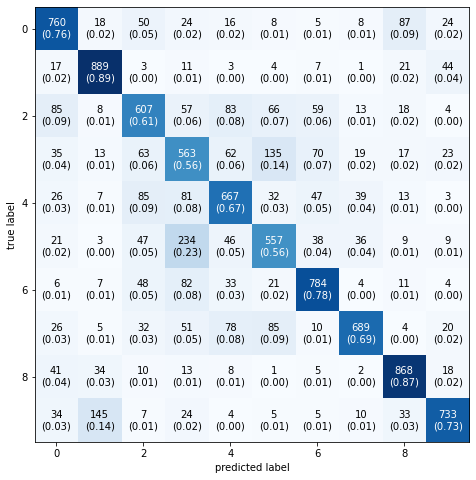

In [83]:
plot_confusion_matrix(conf_mat=con,figsize=(8,8),show_normed=True);

In [84]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#1st layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#2nd layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_142 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 16, 16, 64)      

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 12s 310us/sample - loss: 1.6782 - sparse_categorical_accuracy: 0.3758 - val_loss: 1.3709 - val_sparse_categorical_accuracy: 0.5066
Epoch 2/10
40000/40000 [==============================] - 11s 276us/sample - loss: 1.2435 - sparse_categorical_accuracy: 0.5535 - val_loss: 1.0667 - val_sparse_categorical_accuracy: 0.6175
Epoch 3/10
40000/40000 [==============================] - 11s 275us/sample - loss: 1.0419 - sparse_categorical_accuracy: 0.6273 - val_loss: 1.0558 - val_sparse_categorical_accuracy: 0.6272
Epoch 4/10
40000/40000 [==============================] - 11s 276us/sample - loss: 0.9239 - sparse_categorical_accuracy: 0.6720 - val_loss: 0.8537 - val_sparse_categorical_accuracy: 0.6944
Epoch 5/10
40000/40000 [==============================] - 11s 278us/sample - loss: 0.8329 - sparse_categorical_accuracy: 0.7041 - val_loss: 0.7854 - val_sparse_categorical_accuracy: 0.7232
Epoch

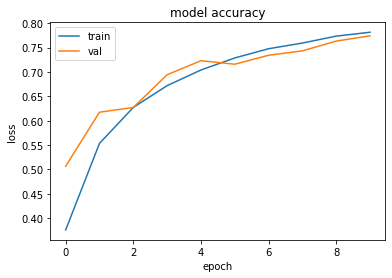

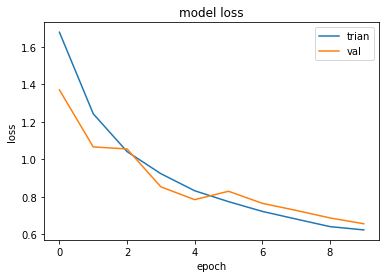

In [87]:
epoch_range=range(10)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"])
plt.show()


plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["trian","val"])
plt.show()

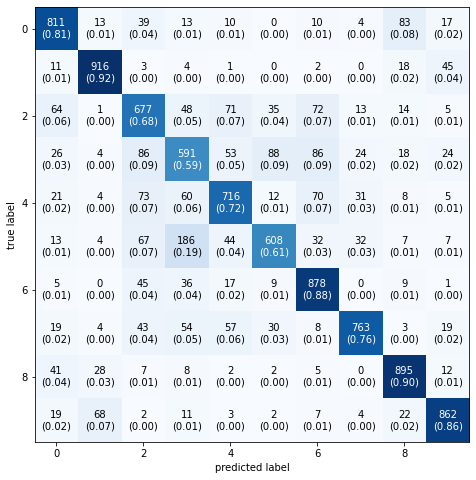

In [86]:
y_pred=model.predict_classes(x_test)
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=con,figsize=(8,8),show_normed=True);

In [88]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#1st layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#2nd layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 16, 16, 64)      

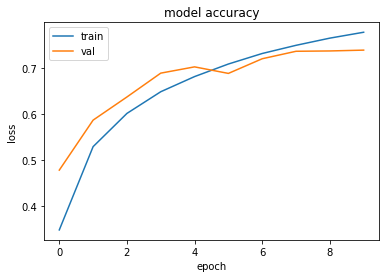

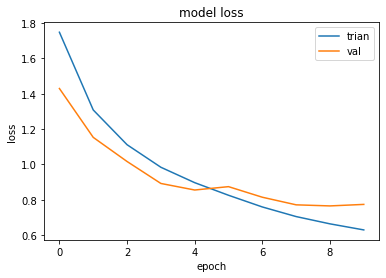

In [89]:
epoch_range=range(10)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"])
plt.show()


plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["trian","val"])
plt.show()

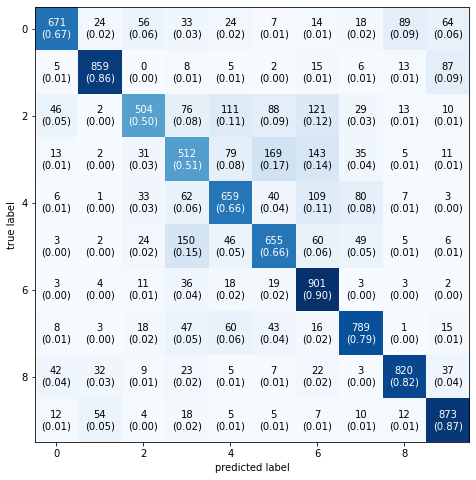

In [90]:
y_pred=model.predict_classes(x_test)
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=con,figsize=(8,8),show_normed=True);